# Desigualdades na Mobilidade Urbana no Brasil {.unnumbered}


## Glossário {-}

### 1. Viagens longas e qualidade de vida {-}

Introdução: Por que o tempo de deslocamento casa-trabalho é importante? 

### 2. Importação de Dados {-}

Visão geral das fontes de dados e do processo de importação.

### 3. Limpeza de Dados {-}

Tratamento dos dados para garantir a qualidade e a confiabilidade da análise.

### 4. Análise de Dados {-}

Visualização e interpretação dos dados.

### 5. Conclusão {-}

Considerações finais e sugestão para futuras análises.

### 6. Referências {-}

Resumo dos principais resultados e considerações finais.

## Viagens longas e qualidade de vida {-}

Estudos mostram que viagens longas estão associadas a maiores níveis de fadiga, stresse, má qualidade de saúde mental, tensão muscular e baixa satisfação com o trabalho[1]. Além disso, enfrentar longos engarrafamos pode afetar negativamente na satisficação com a vida e satisfação econômica[2].
Viagens longas também podem estar associadas com padrões comportamentais que ao longo do tempo contribuem para obesidade e outros resultados de uma saúde de má qualidade [3]

O objetivo dessa análise é identificar o quão desigual é o tempo de deslocamento casa-trabalho de trabalhadores no Brasil. Para isso, utilizo os dados da PNS (pesquisa nacional de saúde) de 2019 realizada pelo IBGE (https://www.ibge.gov.br/estatisticas/sociais/saude/9160-pesquisa-nacional-de-saude.html), o índice PNT (People Near Transit) (https://mobilidados.org.br/database?category_slug=dados-brutos-e-indicadores) do Instituto de Políticas de Transporte e Desenvolvimento (ITDP) (https://itdpbrasil.org/pnt/) e, para comparação, os dados do Gabinete de Estatísticas da União Europeia (Eurostat) (https://ec.europa.eu/eurostat).

## Importando os dados {-}

In [20]:
# Importação das bibliotecas 
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker



Importando os dados da PNS 2019, Eurostat e do índice PNT.

In [17]:
pns_df = pd.read_csv("C:/Users/pdaniel/Learning/pns2019.csv")
euro_df = pd.read_excel("C:/Users/pdaniel/Learning/commute_time_europe.xlsx")
pnt_df = pd.read_excel("C:/Users/pdaniel/Learning/pnt_pessoas_proximas.xlsx", sheet_name = "PNT_RM", skiprows = 2)
#print(pns_df)
#print(euro_df)

## Limpeza dos dados {-}

### Tratando os dados da PNS 2019 {-}

O dataset da PNS é composta por códigos indicando as perguntas e respostas de cada cidadão entrevistado. O princiopal objetivo dessa seção é separar as informações úteis para análise e converter os códigos de acordo com as informações fornecidas no dicionário da pns 2019 (encontrado em: https://www.ibge.gov.br/estatisticas/downloads-estatisticas.html?caminho=PNS/2019/Microdados/Documentacao)

Alguns códigos úteis da PNS:
* V0001 - Unidade da federação.
* M00402 - Quanto tempo em minutos o(a) Sr(a) gasta, normalmente, por dia, no deslocamento para o(s) seu(s) trabalho(s), considerando ida e volta. (somente pessoas empregadas) (Resposta em minutos) 
* M00401 - Quanto tempo em horas o(a) Sr(a) gasta(va), normalmente, por dia, no deslocamento para o(s) seu(s) trabalho(s), considerando ida e volta. (somente pessoas empregadas) (Respota em horas)
* V0026 - Tipo de situação censitária (Urbano ou Rural).
* VDF004 -Faixa de rendimento domiciliar per capita (exclusive o rendimento das pessoas cuja condição na unidade domiciliar era pensionista, empregado doméstico ou parente do empregado doméstico)* 
C009 > Cor ou raça


In [19]:
# Criando um dicionário com os códigos da UF (V0001)
code_to_uf = {
    11:'Rondônia',
    12:'Acre',
    13:'Amazonas',
    14:'Roraima',
    15:'Pará',
    16:'Amapá',
    17:'Tocantins',
    21:'Maranhão',
    22:'Piauí',
    23:'Ceará',
    24:'Rio Grande do Norte',
    25:'Paraíba',
    26:'Pernambuco',
    27:'Alagoas',
    28:'Sergipe',
    29:'Bahia',
    31:'Minas Gerais',
    32:'Espírito Santo',
    33:'Rio de Janeiro',
    35:'São Paulo',
    41:'Paraná',
    42:'Santa Catarina',
    43:'Rio Grande do Sul',
    50:'Mato Grosso do Sul',
    51:'Mato Grosso',
    52:'Goiás',
    53:'Distrito Federal'
}

# Criando um dicionário para converter os códigos de localidade (V0026)
code_to_loc = {1:"Urbano",
               2:"Rural"}

# Criando um dicionário para converter os códigos pela faixa de rendimento per capita (partes do salário mínimo)
rendimento_domiciliar = {
    1: "Até 0,25 salário mínimo",
    2: "Mais de 0,25 até 0,5 salário mínimo",
    3: "Mais de 0,5 até 1 salário mínimo",
    4: "Mais de 1 até 2 salários mínimos",
    5: "Mais de 2 até 3 salários mínimos",
    6: "Mais de 3 até 5 salários mínimos",
    7: "Mais de 5 salários mínimos"
}

# Criando um dincionário para converter os códigos para a cor ou raça dos entrevistados.
code_to_race = {
    1: 'Branca',
    2: 'Preta',
    3: 'Amarela',
    4: 'Parda',
    5: 'Indígena',
    9: 'Ignorado'
}

# Renomeando as colunas
pns_df.rename(columns = {"V0001": "uf"}, inplace=True)
pns_df.rename(columns = {"M00402": "tempo_des_casa_trab_min"}, inplace=True)
pns_df.rename(columns = {"M00401": "tempo_des_casa_trab_hr"}, inplace=True)
pns_df.rename(columns = {"V0026": "localidade"}, inplace=True)
pns_df.rename(columns = {"VDF004": "renda_per_capta"}, inplace=True)
pns_df.rename(columns = {"C009": "cor_raca"}, inplace=True)

# Convertendo os códigos dos UFs
pns_df["uf"] = pns_df["uf"].map(code_to_uf)
#pns_df["tempo_des_casa_trab"] = pns_df["tempo_des_casa_trab"].fillna(0)

# Convertendo os códigos das localidadews
pns_df["localidade"] = pns_df["localidade"].map(code_to_loc)

# Convertendo os códigos de rendimento domiciliar per capta
pns_df["renda_per_capta"] = pns_df["renda_per_capta"].map(rendimento_domiciliar)

# Convertendo os códigos da cor ou raça do entrevistado.
pns_df["cor_raca"] = pns_df["cor_raca"].map(code_to_race)

# Filtrando o dataframe somente com as entrevistas de moradores da área urbana.
pns_df = pns_df[pns_df["localidade"] == "Urbano"]

# Transformo o tempo da coluna 'tempo_des_casa_trab_hr' de hora para minutos
pns_df["tempo_des_casa_trab_hr"] = pns_df["tempo_des_casa_trab_hr"]*60

# Crio uma outra coluna para somar o tempo das 'tempo_des_casa_trab_hr' e tempo_des_casa_trab_min' e ter o tempo de deslocamento total
pns_df["tempo_des_total_min"] = pns_df["tempo_des_casa_trab_hr"] + pns_df["tempo_des_casa_trab_min"]

#display(pns_df_urbano)
#display(pns_df["cor_raca"])


### Tratando os dados da Eurostat {-}

Utilizo informações já utilizo um dataset já filtrado da Eurostat(https://ec.europa.eu/eurostat/databrowser/view/LFSO_19PLWK28/bookmark/table?lang=en&bookmarkId=96ad2e59-267b-404c-97e2-133b7fa05022), contendo o tempo de deslocamento médio de deslocamento casa-trabalho de trabalhadores da Europa em regiões urbanas. 
Nessa seção, quero excluir os itens do dataset "Euro area", "European Union" e "Turkey" e multiplico o tempo por dois (A Eurostat só considera o tempo de "ida" ao trabalho).

In [4]:
# Cria um novo dataframe filtrado
filtred_euro_df = euro_df[3:-1] 

# Multiplico o tempo por dois para ter o tempo de ida e volta.
filtred_euro_df["Tempo (min)"] = filtred_euro_df["Tempo (min)"]*2 


print("Dataframe antes: ","\n", euro_df, '\n\n', "Dataframe depois: ",'\n', filtred_euro_df)

Dataframe antes:  
                                          País Tempo (min)
0   European Union - 27 countries (from 2020)          27
1   European Union - 28 countries (2013-2020)          28
2       Euro area - 19 countries  (2015-2022)          27
3                                     Belgium          28
4                                    Bulgaria          28
5                                     Czechia          30
6                                     Denmark          26
7                                     Germany          28
8                                     Estonia          23
9                                     Ireland          29
10                                     Greece          24
11                                      Spain          27
12                                     France          28
13                                    Croatia          27
14                                      Italy          24
15                                     Cyprus       

C:\Users\pdaniel\AppData\Local\Temp\ipykernel_4992\1406698083.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtred_euro_df["Tempo (min)"] = filtred_euro_df["Tempo (min)"]*2


### Tratando os dados da pnt {-}

In [5]:
#Filtrando os resultados somente para o indicador "PNT GERAL"
pnt_df_filtrado = pnt_df[pnt_df["INDICADOR"] == "PNT_Geral"]

# Filtrando os resultados somente para o ano de 2019 e use somente as colunas "UF" e "2019"
pnt_df_filtrado = pnt_df_filtrado[["UF", 2019]]

# Organiza os valores em ordem decrescente
pnt_df_filtrado.sort_values(2019, ascending = True, inplace = True)

# Convertendo os valores para porcentagem
#pnt_df_filtrado[2019] = (pnt_df_filtrado[2019]).apply('{:.0%}'.format)


display(pnt_df_filtrado)

,UF,2019
49,BA,0.04
14,DF,0.06
7,MG,0.08
28,CE,0.08
0,PA,0.09
56,SP,0.13
35,PE,0.14
21,PR,0.18
42,RJ,0.19


## Análise dos dados e visualizações {-}

### Brasil comparado a Europa {-}

Para essa análise, utilizei os dados dos trabalhos ativos da Europa (de 15 até 74 anos) somente de áreas urbanas

In [6]:
# Determina o tempo médio de deslocamento do Brasil
num_entrevistas = pns_df["tempo_des_total_min"].count()
tempo_medio_brasil = pns_df["tempo_des_total_min"].sum()/num_entrevistas
print(f"Tempo de deslocamento médio do Brasil: {tempo_medio_brasil:.1f} minutos por dia ou {tempo_medio_brasil*5/60:.1f} horas por semana ")

# Cria um novo dataframe adicionando "Brazil" aos países da UE.
brasil_euro_df = filtred_euro_df.append({'País': 'Brazil', "Tempo (min)": round(tempo_medio_brasil)}, ignore_index = True)
brasil_euro_df.sort_values('Tempo (min)', ascending = False, inplace = True) # Coloca em ordem decrescente por tempoi
    
#display(brasil_euro_df)

Tempo de deslocamento médio do Brasil: 59.1 minutos por dia ou 4.9 horas por semana 


C:\Users\pdaniel\AppData\Local\Temp\ipykernel_4992\2803739485.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  brasil_euro_df = filtred_euro_df.append({'País': 'Brazil', "Tempo (min)": round(tempo_medio_brasil)}, ignore_index = True)


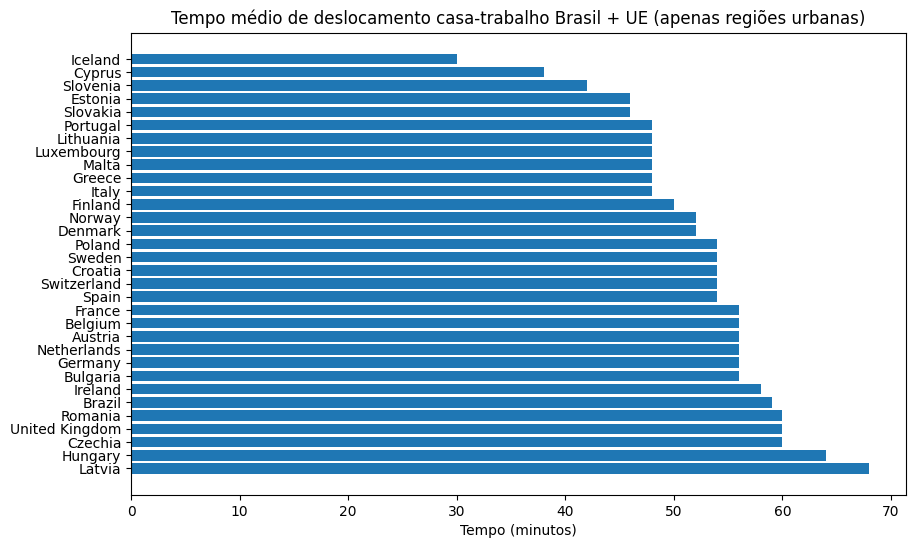

In [7]:
plt.figure(figsize=(10, 6))
plt.barh(brasil_euro_df["País"], brasil_euro_df["Tempo (min)"])
plt.title('Tempo médio de deslocamento casa-trabalho Brasil + UE (apenas regiões urbanas)')
plt.xlabel('Tempo (minutos)')
plt.xticks(rotation=0)
#plt.legend(title='State')

plt.show()

Apesar de o Brasil ter um tempo médio de deslocamento apenas ligeiramente inferior aos países da Europa, é importante enfatizar que alguns países da Europa, geralmente países de menor território e com populações menores, possuem condições uma pouco mais igualitárias e homogêneos,como na Grécia e Ciprus em que, respectivamente, 75.8% e 75,5% da população estava sujeita as mesmas condições de um deslocamento de menos de 30 minutos na ida para o trabalho[4]. 
No caso do Brasil, um país de grande extensão territorial e com uma população muito grande e diversa, vale a pena investigar como diferentes grupos da população passam por essa questão.

### Acessibilidade aos meios de transporte no Brasil {-}


Dados sobre o percentual de pessoas próximas da rede de transporte de média e alta capacidade (PNT


PNT(People Near Rapid Transit) -> Os estados mais populosos e o Distrtito Federal por proporação de pessoas que moram perto de transportes de média alta capacidade (BRT, metrô, trens e VLT) (1 km) na região metropolitana

Aqui utilizo o  PNT(People Near Rapid Transit), para analisar os estados mais populosos e o Distrtito Federal por proporação de pessoas que moram perto de transportes de média alta capacidade (BRT, metrô, trens e VLT) (1 km) na região metropolitana


In [8]:
# Crio um outro dataframe contendo somente as colunas de sigla_uf e prop_pessoas_proximas_pnt 
pnt_df
#display(pnt_df_filtrado)

pnt_df_filtrado.dtypes

display(pnt_df_filtrado)



,UF,2019
49,BA,0.04
14,DF,0.06
7,MG,0.08
28,CE,0.08
0,PA,0.09
56,SP,0.13
35,PE,0.14
21,PR,0.18
42,RJ,0.19


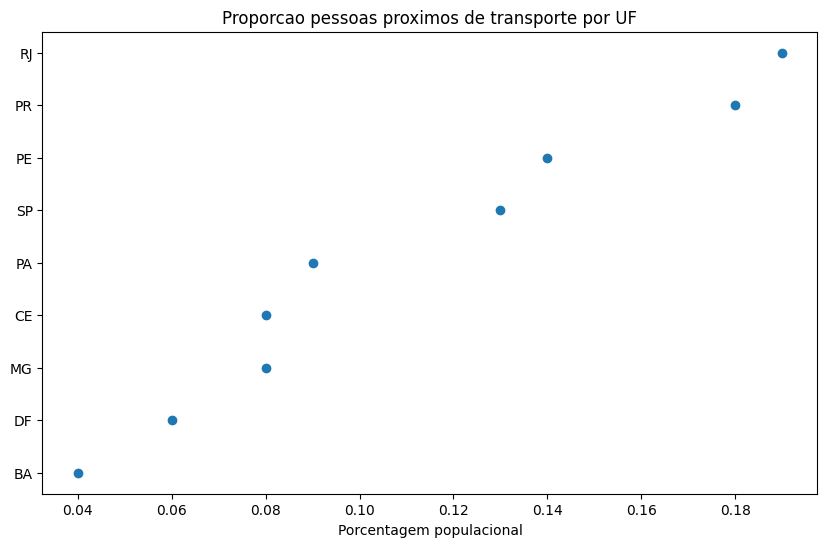

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(pnt_df_filtrado[2019], pnt_df_filtrado["UF"])
plt.title('Proporcao pessoas proximos de transporte por UF')
plt.xlabel('Porcentagem populacional')
plt.xticks(rotation=0)

#plt.legend(title='State')

plt.show()

Aqui evidencia-se que somente uma pequena parte dos habitantes dos estados mais populosos possuem fácil acesso a transporte de média alta capacidade, o que impacta diretamente no tempo de deslocamento do cidadão.

### Tempo de deslocamento médio por UF apenas em regiões urbanas {-}

As análise aqui considerararão somente as regiões urbanas

É sabido que cada UF do Brasil possui condições únicas de investimento e mobilidade urbana, mas como essas condições refletem no tempo de deslocamento médio casa-trabalho do trabalhador?

In [10]:
# Crio um outro dataframe contendo somente as colunas de UF e tempo
tempo_des_uf= pns_df[["uf","tempo_des_total_min"]]

# Calculando o tempo médio por uf
temp_des_medio_uf = tempo_des_uf.groupby("uf", as_index= False)["tempo_des_total_min"].mean()

# Coloco em ordem decrescente por tempo de deslocamento
temp_des_medio_uf.sort_values('tempo_des_total_min', ascending = False, inplace = True)
display(temp_des_medio_uf)


,uf,tempo_des_total_min
20,Rio de Janeiro,87.106460
25,São Paulo,75.562826
6,Distrito Federal,71.362029
4,Bahia,69.165125
16,Pernambuco,67.906535
3,Amazonas,65.015576
15,Pará,64.320364
12,Minas Gerais,63.704805
24,Sergipe,61.383215
7,Espírito Santo,60.963429


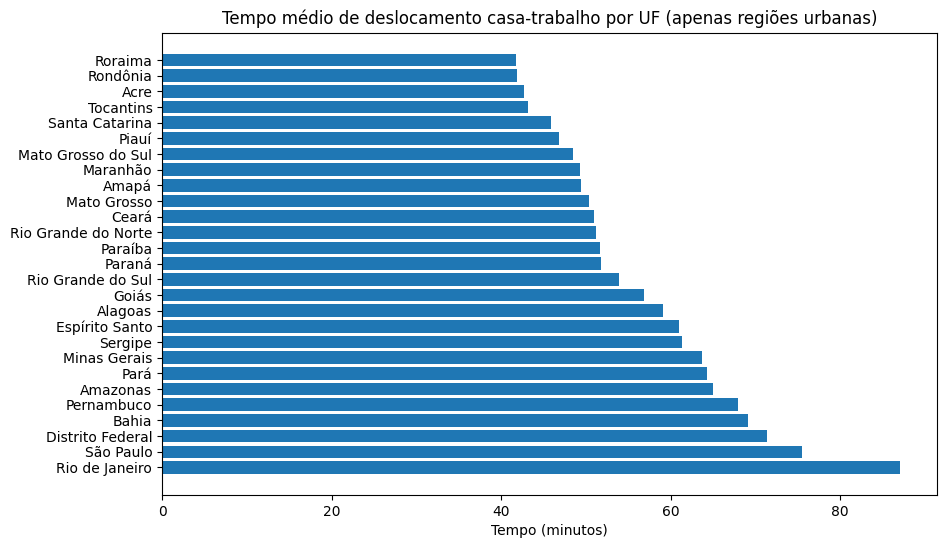

In [11]:
plt.figure(figsize=(10, 6))
plt.barh(temp_des_medio_uf["uf"], temp_des_medio_uf["tempo_des_total_min"])
plt.title('Tempo médio de deslocamento casa-trabalho por UF (apenas regiões urbanas)')
plt.xlabel('Tempo (minutos)')
plt.xticks(rotation=0)
#plt.legend(title='State')

plt.show()

Aqui já conseguimos notar uma grande variação no tempo médio de deslocamente por estado. Roraima tem um tempo 30,5 % menor que a média enquanto RJ tem um tempo de 47,4 % maior que a média nacional.

Ainda assim, diferentes grupos sociais possuem condições diferentes de locomoção.

A média do Brasil é de aproximadamente 56,4 minutos por dia ou 4,7 horas por semana. 

### Tempo dedeslocamento médio por renda familiar per capta {-}

Aqui eu filtro os dados para considerar somente os trabalhadores com renda familiar per capta acima de 0,5 salário mínimos para desconsiderar as situações de extrema pobreza.

In [12]:
# Crio um dataframe somente com as colunas de renda familiar per capta e tempo de deslocamento total em minutos
tempo_renda_df = pns_df[["renda_per_capta", "tempo_des_total_min"]]

# Calculando o tempo médio por renda
tempo_medio_renda_df = tempo_renda_df.groupby(tempo_renda_df["renda_per_capta"], as_index = False ).mean()

display(tempo_medio_renda_df)

# Filtrando para eliminar trabalhadores que com renda familiar per capta abaixo de 0,5 salários mínimos
tempo_medio_renda_df_filtrado = tempo_medio_renda_df[2:]
display(tempo_medio_renda_df_filtrado.dtypes)



,renda_per_capta,tempo_des_total_min
0,"Até 0,25 salário mínimo",55.783961
1,"Mais de 0,25 até 0,5 salário mínimo",59.588697
2,"Mais de 0,5 até 1 salário mínimo",62.036997
3,Mais de 1 até 2 salários mínimos,59.950280
4,Mais de 2 até 3 salários mínimos,58.123821
5,Mais de 3 até 5 salários mínimos,55.173776
6,Mais de 5 salários mínimos,53.045455


renda_per_capta         object
tempo_des_total_min    float64
dtype: object

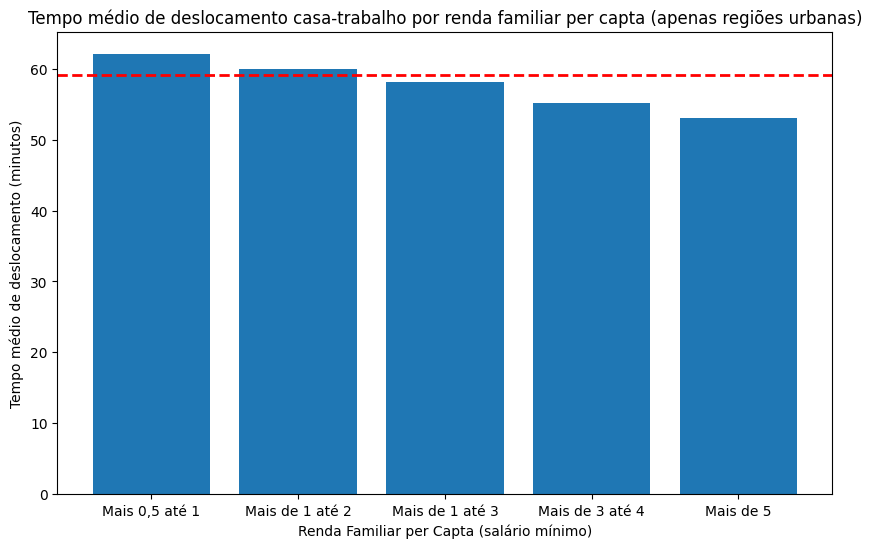

In [13]:
plt.figure(figsize=(10, 6))
plt.bar(tempo_medio_renda_df_filtrado["renda_per_capta"], tempo_medio_renda_df_filtrado["tempo_des_total_min"])
plt.title('Tempo médio de deslocamento casa-trabalho por renda familiar per capta (apenas regiões urbanas)')
plt.xlabel('Renda Familiar per Capta (salário mínimo)')
plt.ylabel('Tempo médio de deslocamento (minutos)')
plt.axhline(y=tempo_medio_brasil,linewidth=2, color='red', linestyle = "--") # Média nacional

# Renomeia as categorias
plt.xticks(tempo_medio_renda_df_filtrado["renda_per_capta"], ['Mais 0,5 até 1', 'Mais de 1 até 2', 'Mais de 1 até 3', 'Mais de 3 até 4', 'Mais de 5'])

#plt.legend(title='State')

plt.show()

E fica evidente que grupos sociais com rendas maiores tendem a demorar mais tempo para chegar ao trabalho. Algumas das hipótes que ajudam a explicar esse fenômeno são: 

* Localização residencial/Opções de moradia -> uma vez que grupos de renda mais alta muitas vezes tem condições de morar ou se mudar para áreas mais próximas aos seus locas de trabalho
* Meios de Transporte -> Uma maior renda facilita o acesso a uma maior variedade de meios de transporte mais rápidos e confortáveis, como táxis, carros particulares ou transporte por aplicativo, o que pode reduzir significativamente o tempo para chegar aoo trabalho
* Flexibilidade no horário de trabalho -> 

### Tempo médio de deslocamento por etnia. {-}

In [14]:
# Cria somente com o tempo de deslocamento e a coluna de etnia.
tempo_des_raca_df = pns_df[['cor_raca', 'tempo_des_total_min']]

# Calculando o tempo médio por etnia
tempo_des_raca_medio_df = tempo_des_raca_df.groupby(tempo_des_raca_df["cor_raca"], as_index = False ).mean()

# Filtrando os valores para desconsiderar as entrevistas em que a etnia foi ignorada
tempo_des_raca_medio_df = tempo_des_raca_medio_df[tempo_des_raca_medio_df['cor_raca'] != "Ignorado"]

tempo_des_raca_medio_df['cor_raca'] = tempo_des_raca_medio_df['cor_raca'].astype(str)
display(tempo_des_raca_medio_df)

,cor_raca,tempo_des_total_min
0,Amarela,62.801917
1,Branca,55.776668
3,Indígena,56.857741
4,Parda,58.988167
5,Preta,69.373037


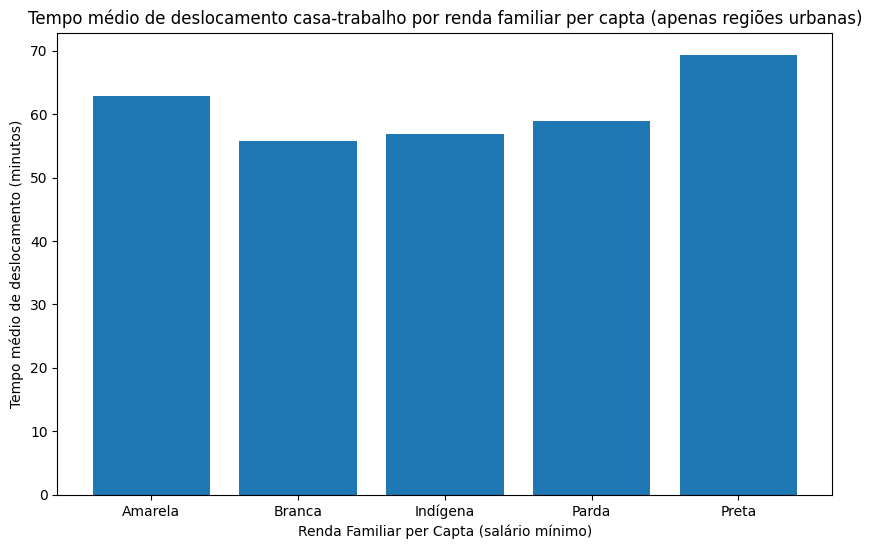

In [15]:
plt.figure(figsize=(10, 6))
plt.bar(tempo_des_raca_medio_df["cor_raca"], tempo_des_raca_medio_df["tempo_des_total_min"])
plt.title('Tempo médio de deslocamento casa-trabalho por renda familiar per capta (apenas regiões urbanas)')
plt.xlabel('Renda Familiar per Capta (salário mínimo)')
plt.ylabel('Tempo médio de deslocamento (minutos)')
#plt.axhline(y=tempo_medio_brasil,linewidth=2, color='red', linestyle = "--") # Média nacional


plt.show()

As diferenças étnicas são estruturais e complexas. Aqui observa-se um diferença de 23% entre os extremos. 

Pretos -> 69.373037 min por dia ou 12 dias por ano
Brancos -> 55.776668 min por dia ou 9.6 dias por ano


## Checagem do resultado {-}

A minha média de deslocamento ao trabalho no país por semana deu aprox 4,9 horas. 

O média publicada pela revista Valor Globo sobre os dados do pns 2019 foi de 4,8 horas semanais. Vale ressaltar que possivelmente certos parâmetro da filtragem (região urbana, rural, metropolitana, trabalhadores ativos ou inativos) certamente explicaria essa mínima diferença.

https://valor.globo.com/brasil/noticia/2021/05/07/ibge-tempo-de-deslocamento-ao-trabalho-no-pais-e-de-48h-por-semana-mas-chega-a-78h-em-sp.ghtml
https://educa.ibge.gov.br/professores/educa-atividades/21353-deslocamento-para-o-trabalho.html#:~:text=O%20tempo%20m%C3%A9dio%20de%20deslocamento,5%20horas%20em%20%C3%A1rea%20rural.


## Conclusão {-}

Apesar de o Brasil não possuir um tempo médio de deslocamento para o trabalho extremamente alto quando comparado a padrões internacionais, verifica-se uma grande desigualdade, uma vez que diferentes grupos populacionais possuem experiências muito diferentes.

#### Para análise mais profundas {-}

Para ter uma melhor noção da desigualdade do Brasil comparado a outros países nesse quesito, poderíamos extender a gama de análise calculando a **variância** e o **desvio padrão** e comparar com os valores de outros países.

Analisar a divisão modal para saber quais meios de transporte são mais utilizados pela população e estudos mais profundos buscando correlacionar o tempo gasto no deslocamento para o trabalho com indicadores de qualidade de vida e como isso afeta a produtividade dos trabalhadores

## Referências

1. Han L, Peng C, Xu Z. The Effect of Commuting Time on Quality of Life: Evidence from China. Int J Environ Res Public Health. 2022 Dec 29;20(1):573. doi: 10.3390/ijerph20010573. PMID: 36612893; PMCID: PMC9819363.
(https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9819363/#:~:text=Data%20from%20the%20US%20showed,strain%2C%20and%20poorer%20mental%20health.)

2. Gimenez-Nadal J.I., Molina J.A. Daily feelings of US workers and commuting time. J. Transp. Health. 2019;12:21–33. doi: 10.1016/j.jth.2018.11.001. 
(https://www.sciencedirect.com/science/article/abs/pii/S2214140518303086#preview-section-references)

3. Christian T.J. Trade-offs between commuting time and health-related activities. J Urban Health. 2012;89:746–757. doi: 10.1007/s11524-012-9678-6. 
(https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3462828/)

4. Main place of work and commuting time - statistics
(https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Main_place_of_work_and_commuting_time_-_statistics)
